In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Use geopandas for vector data and rasterio for raster data
import geopandas as gpd
import rasterio as rio
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep
sns.set(font_scale=1.5, style="white")  

In [ ]:
import rasterio

# Define the path to raster file
file_path = r"C:\Users\dzaik\Downloads\MSC_thesis\Rasters_V2\Rasters_V2\Brazil_water_occurrence.asc"

# Open the raster file using rasterio
with rasterio.open(file_path) as src:
    water_occurrence_array = src.read(1)


    print("Raster CRS:", src.crs)
    print("Raster shape (rows, cols):", water_occurrence_array.shape)
    print("Raster resolution:", src.res)
    print("Raster bounds:", src.bounds)


Raster CRS: None
Raster shape (rows, cols): (4341, 4362)
Raster resolution: (0.00898315284119521, 0.00898315284119521)
Raster bounds: BoundingBox(left=-73.9898282080328, bottom=-33.7420695444554, right=-34.8053155147393, top=5.253796939173007)


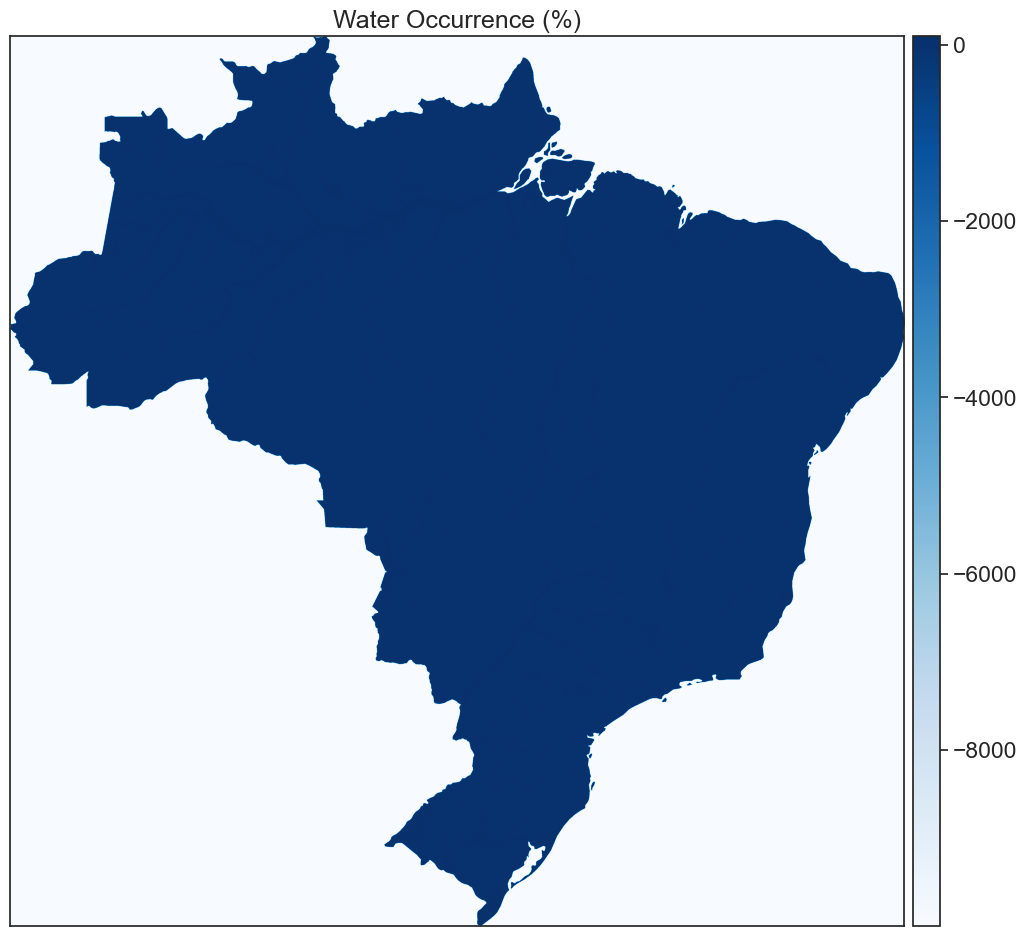

In [3]:
ep.plot_bands(water_occurrence_array,
              title="Water Occurrence (%)",
              cmap="Blues",
              cbar=True)
plt.show()


In [4]:
import numpy as np

In [5]:
print('The minimum raster value is:', np.min(water_occurrence_array))
print('The maximum raster value is:', np.max(water_occurrence_array))

The minimum raster value is: -9999.0
The maximum raster value is: 100.0


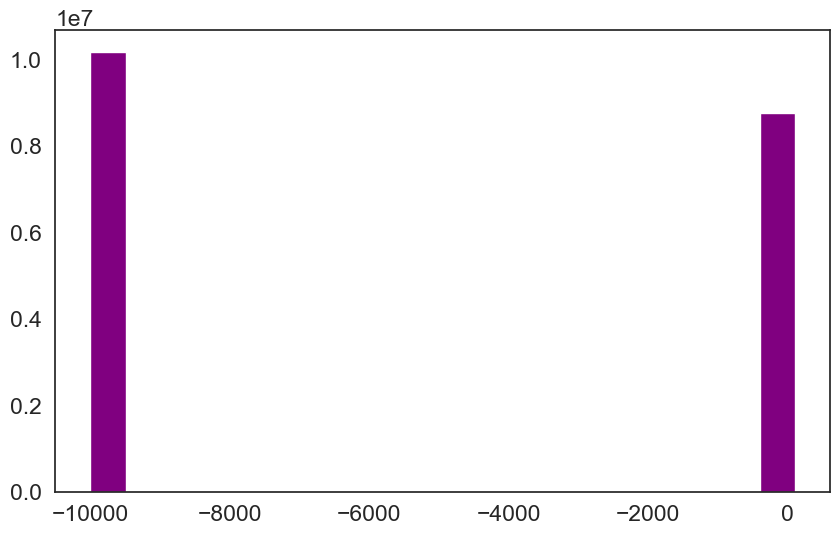

In [6]:

ep.hist(water_occurrence_array,
        figsize=(10, 6))
plt.show()

# Covariate Data Cleaning

NoData value: -9999.0


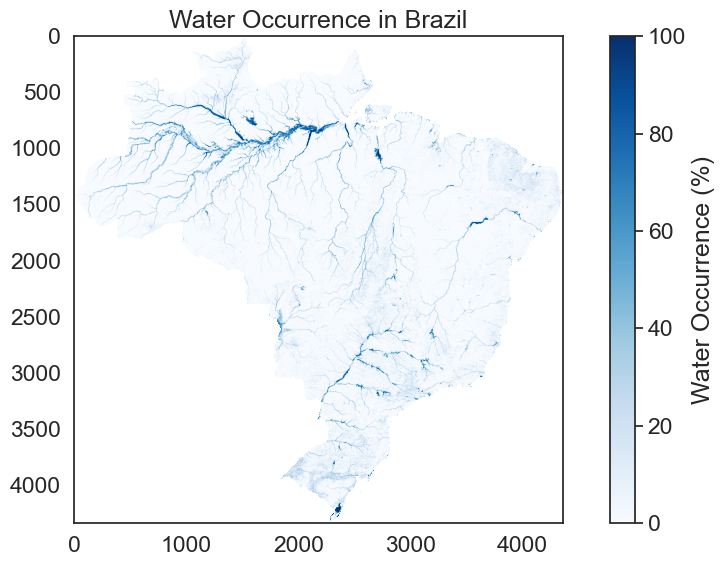

In [ ]:
file_path = r"C:\Users\dzaik\Downloads\MSC_thesis\Rasters_V2\Rasters_V2\Brazil_water_occurrence.asc"
with rasterio.open(file_path) as src:
    water_occurrence_array = src.read(1)
    nodata_val = src.nodata 
    print("NoData value:", nodata_val)
masked_array = np.ma.masked_equal(water_occurrence_array, nodata_val)

# Plot cleaned-up version
plt.figure(figsize=(10, 6))
plt.imshow(masked_array, cmap='Blues')
plt.colorbar(label='Water Occurrence (%)')
plt.title('Water Occurrence in Brazil')
plt.tight_layout()
plt.show()


In [8]:
masked_array

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-9999.0,
  dtype=float32)

In [9]:
print('the minimum raster value is :', masked_array.min())
print('the maximum raster value is :', masked_array.max())

the minimum raster value is : 0.0
the maximum raster value is : 100.0


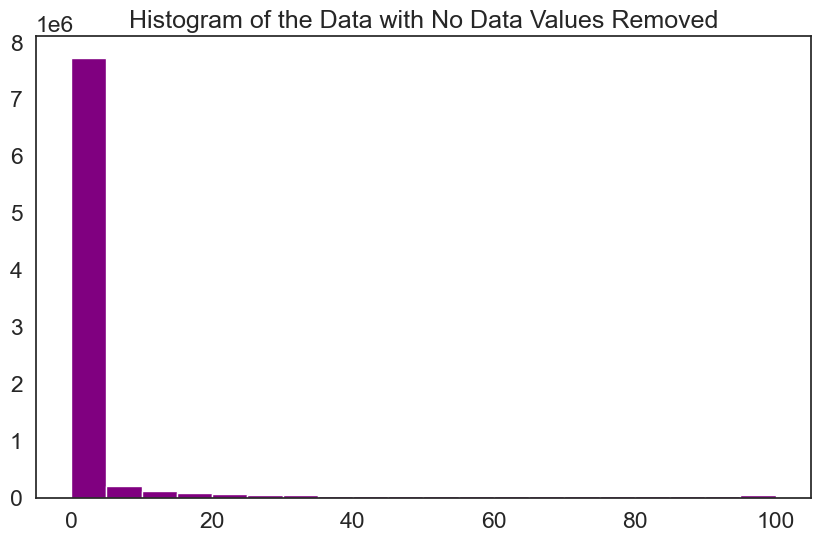

In [10]:
ep.hist(masked_array,
        figsize=(10, 6),
        title="Histogram of the Data with No Data Values Removed")
plt.show()

# Covariate Information for Final model 

In [11]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_covariate_map(file_path, title=None, cmap='viridis', label='Value'):
    """
    Plot a single-band raster covariate map.

    Parameters:
    - file_path: str, full path to the .asc raster file
    - title: str, optional title for the plot
    - cmap: str, matplotlib colormap (default: 'viridis')
    - label: str, colorbar label (default: 'Value')
    """
    try:
        with rasterio.open(file_path) as src:
            array = src.read(1)
            nodata_val = src.nodata

        masked_array = np.ma.masked_equal(array, nodata_val)

        plt.figure(figsize=(10, 6))
        plt.imshow(masked_array, cmap=cmap)
        plt.colorbar(label=label)

        # Use filename as title if none provided
        plot_title = title or os.path.basename(file_path).replace('_', ' ').replace('.asc', '')
        plt.title(plot_title)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {file_path}: {e}")


# Visualization

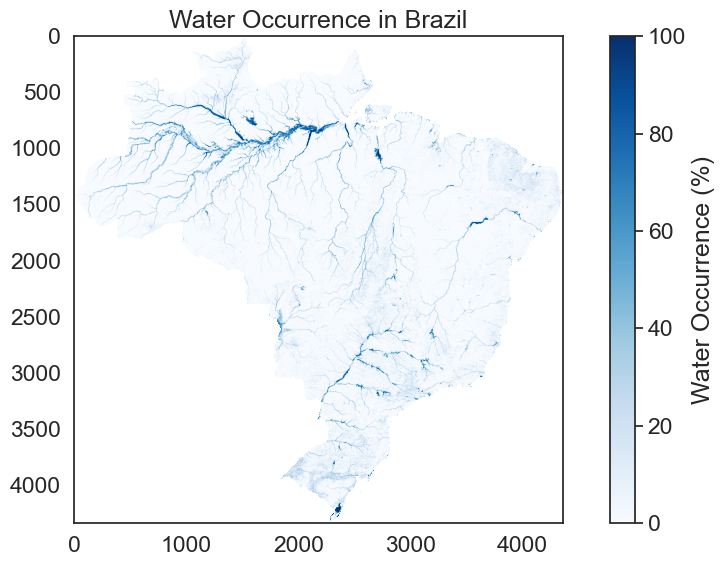

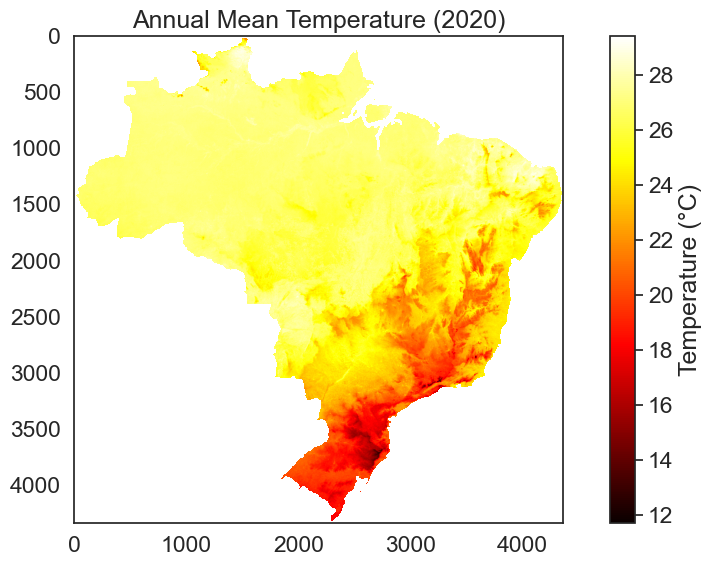

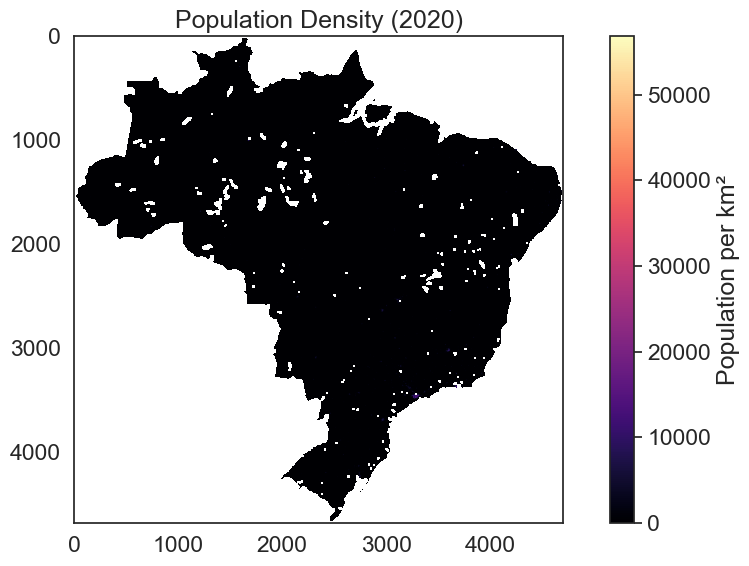

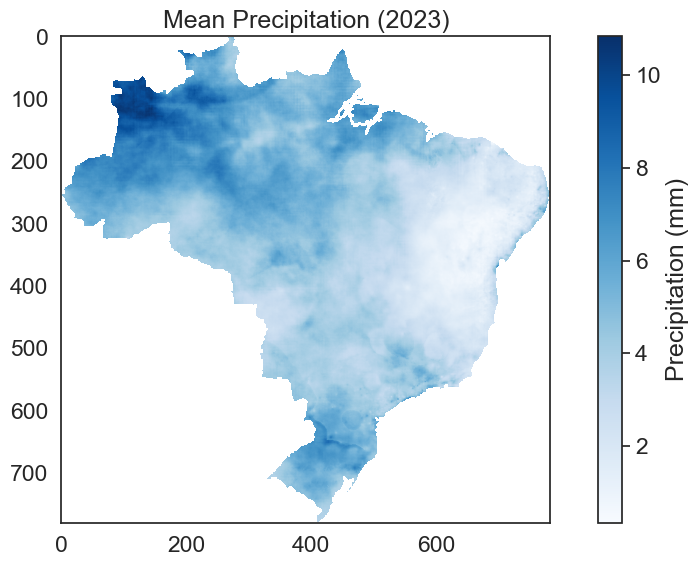

In [16]:
plot_covariate_map(
    r"C:\Users\dzaik\Downloads\MSC_thesis\Rasters_V2\Rasters_V2\Brazil_water_occurrence.asc",
    title="Water Occurrence in Brazil",
    cmap='Blues',
    label='Water Occurrence (%)'
)

plot_covariate_map(
    r"C:\Users\dzaik\Downloads\MSC_thesis\Rasters_V2\Rasters_V2\Brazil_annual_mean_temp_2020_crop_mask.asc",
    title="Annual Mean Temperature (2020)",
    cmap='hot',
    label='Temperature (°C)'
)

plot_covariate_map(
    r"C:\Users\dzaik\Downloads\MSC_thesis\Rasters_V2\Rasters_V2\Brazil_pop_density_2020.asc",
    title="Population Density (2020)",
    cmap='magma',
    label='Population per km²'
)

plot_covariate_map(
    r"C:\Users\dzaik\Downloads\MSC_thesis\Rasters_V2\Rasters_V2\Brazil_precipitation_mean_2023_crop_mask.asc",
    title="Mean Precipitation (2023)",
    cmap='Blues',
    label='Precipitation (mm)'
)


# Population Density Data Cleaning 

In [ ]:
import rasterio

# Define the path to raster file
file_path = r"C:\Users\dzaik\Downloads\MSC_thesis\Rasters_V2\Rasters_V2\Brazil_pop_density_2020.asc"

# Open the raster file using rasterio
with rasterio.open(file_path) as src:
    popdens_array = src.read(1)


    print("Raster CRS:", src.crs)
    print("Raster shape (rows, cols):", popdens_array.shape)
    print("Raster resolution:", src.res)
    print("Raster bounds:", src.bounds)


Raster CRS: None
Raster shape (rows, cols): (4680, 4703)
Raster resolution: (0.00833333333333334, 0.00833333333333334)
Raster bounds: BoundingBox(left=-74.0000000000001, bottom=-33.7416666666667, right=-34.8083333333334, top=5.258333333333326)


In [24]:
print('The minimum raster value is:', np.min(popdens_array))
print('The maximum raster value is:', np.max(popdens_array))

The minimum raster value is: 0.0
The maximum raster value is: 56809.605


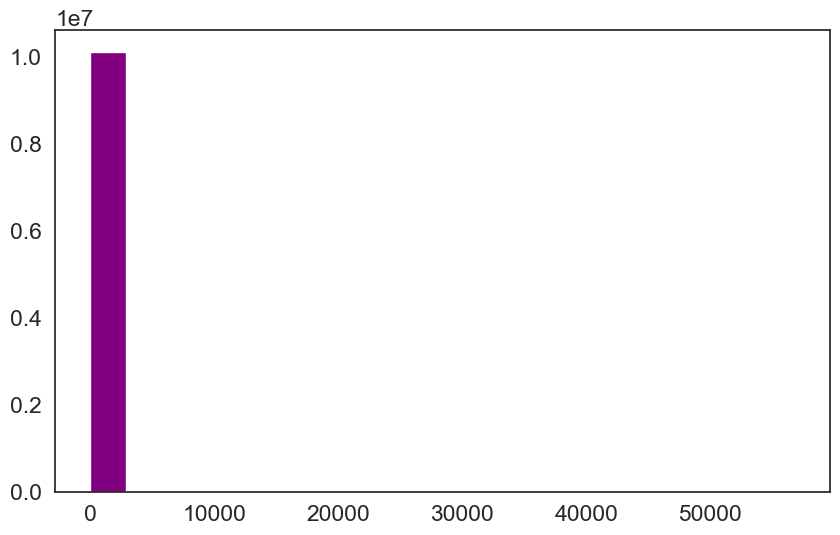

In [25]:

ep.hist(popdens_array,
        figsize=(10, 6))
plt.show()

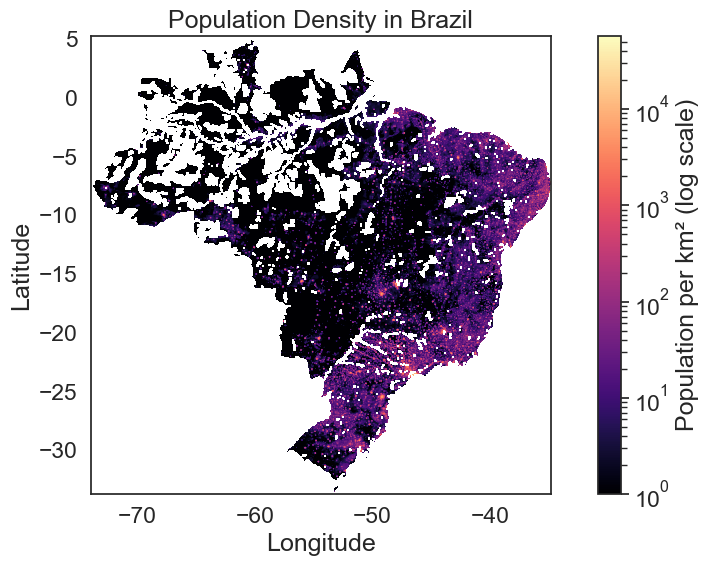

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

file_path = r"C:\Users\dzaik\Downloads\MSC_thesis\Rasters_V2\Rasters_V2\Brazil_pop_density_2020.asc"

with rasterio.open(file_path) as src:
    array = src.read(1)
    nodata = src.nodata
    transform = src.transform 

masked = np.ma.masked_less_equal(array, 0)
if nodata is not None:
    masked = np.ma.masked_equal(masked, nodata)

extent = [
    transform[2], 
    transform[2] + transform[0] * array.shape[1],  
    transform[5] + transform[4] * array.shape[0],
    transform[5] 
]

# Plot with geographic coordinates
plt.figure(figsize=(10, 6))
plt.imshow(masked, cmap='magma', norm=LogNorm(vmin=1, vmax=masked.max()), extent=extent)
plt.colorbar(label='Population per km² (log scale)')
plt.title('Population Density in Brazil')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import rasterio
import os

def plot_covariate_map(
    file_path, 
    title=None, 
    cmap='viridis', 
    label='Value', 
    use_log=False, 
    vmin=1
):
    try:
        with rasterio.open(file_path) as src:
            array = src.read(1)
            nodata = src.nodata
            transform = src.transform

        if use_log:
            array = np.ma.masked_less_equal(array, 0)
        if nodata is not None:
            array = np.ma.masked_equal(array, nodata)

        # Define geographic extent: [xmin, xmax, ymin, ymax]
        extent = [
            transform[2],
            transform[2] + transform[0] * array.shape[1],
            transform[5] + transform[4] * array.shape[0],
            transform[5]
        ]

        # Plot
        plt.figure(figsize=(10, 6))
        if use_log:
            plt.imshow(array, cmap=cmap, norm=LogNorm(vmin=vmin, vmax=np.max(array)), extent=extent)
        else:
            plt.imshow(array, cmap=cmap, extent=extent)

        plt.colorbar(label=label)
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title(title or os.path.basename(file_path).replace('_', ' ').replace('.asc', ''))
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error plotting {file_path}: {e}")


# Visualization with Cleaned Pop Density Data

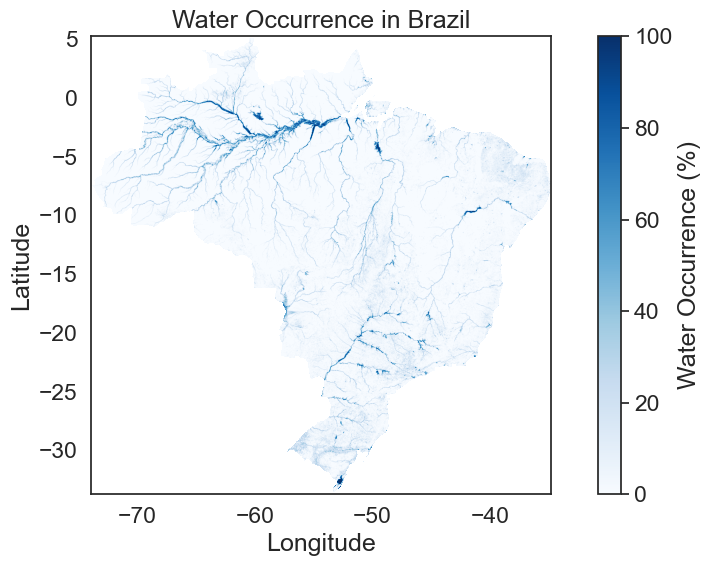

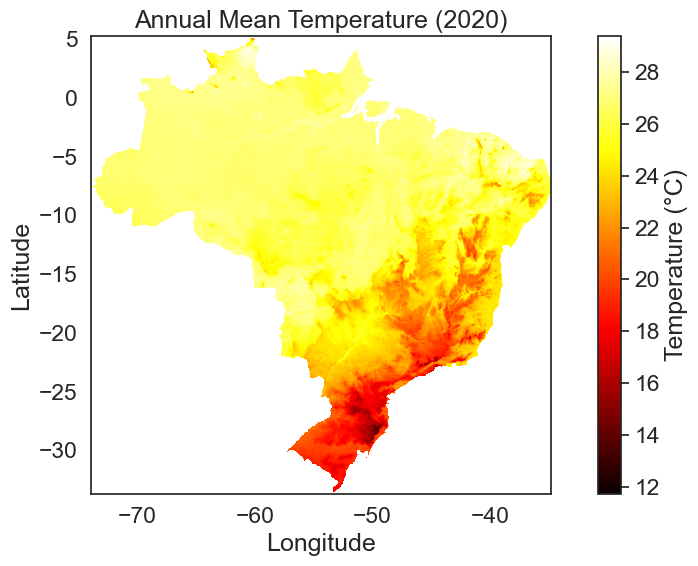

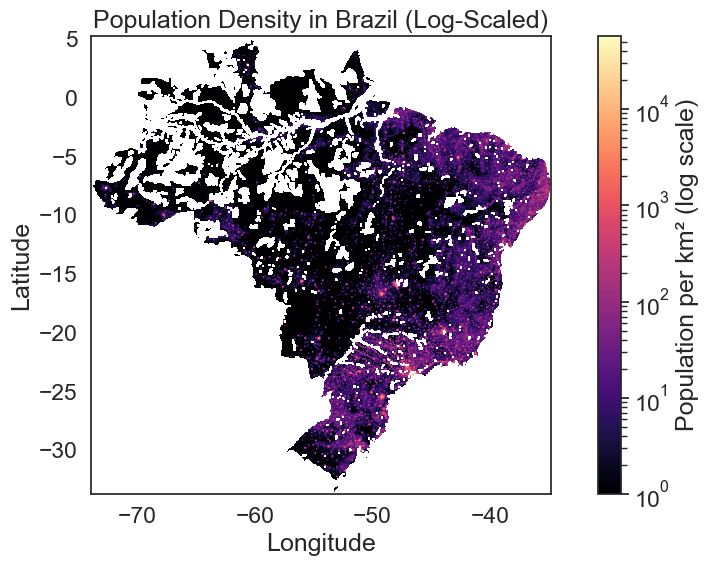

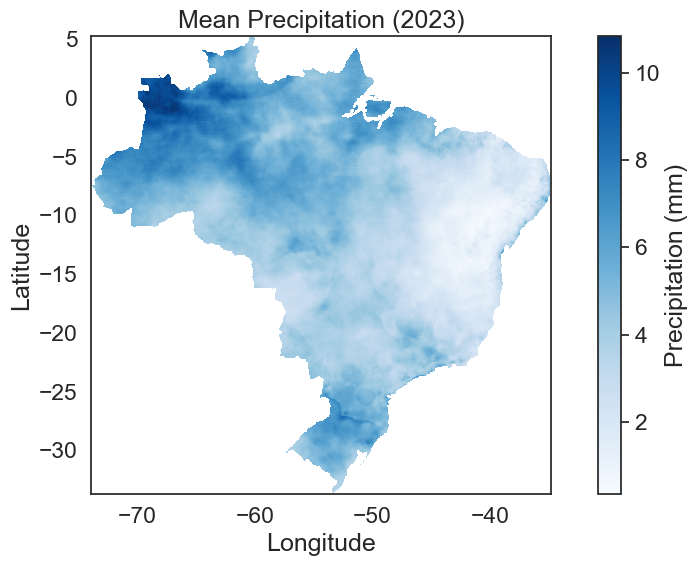

In [ ]:
# Water Occurrence
plot_covariate_map(
    r"C:\Users\dzaik\Downloads\MSC_thesis\Rasters_V2\Rasters_V2\Brazil_water_occurrence.asc",
    title="Water Occurrence in Brazil",
    cmap='Blues',
    label='Water Occurrence (%)'
)

# Annual Mean Temperature
plot_covariate_map(
    r"C:\Users\dzaik\Downloads\MSC_thesis\Rasters_V2\Rasters_V2\Brazil_annual_mean_temp_2020_crop_mask.asc",
    title="Annual Mean Temperature (2020)",
    cmap='hot',
    label='Temperature (°C)'
)

# Population Density (use log scale)
plot_covariate_map(
    r"C:\Users\dzaik\Downloads\MSC_thesis\Rasters_V2\Rasters_V2\Brazil_pop_density_2020.asc",
    title="Population Density in Brazil",
    cmap='magma',
    label='Population per km² (log scale)',
    use_log=True
)

# Precipitation
plot_covariate_map(
    r"C:\Users\dzaik\Downloads\MSC_thesis\Rasters_V2\Rasters_V2\Brazil_precipitation_mean_2023_crop_mask.asc",
    title="Mean Precipitation (2023)",
    cmap='Blues',
    label='Precipitation (mm)'
)
